#### tf.keras.datasets.mnist.load_data
e test data.

In [38]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [39]:
print(x_train[0] , y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [40]:
x_train[0].shape

(28, 28)

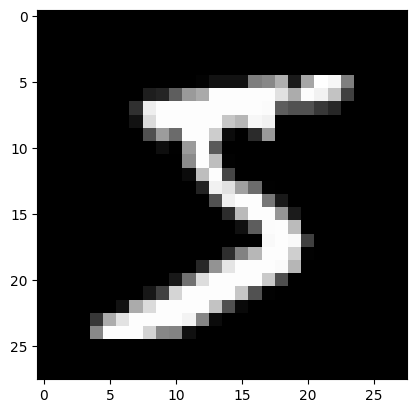

In [41]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0] , 'gray')

In [42]:
# 입력 이미지를 2차원에서 1차원 벡터로 변경한다.
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)
# 입력 이미지의 픽셀 값이 0.0에서 1.0 사이의 값이 되게 한다.
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255
x_test /= 255

In [49]:
batch_size = 128 # 가중치를 변경하기 전에 처리하는 샘플의 개수 
num_classes = 10 # 출력 클래스의 개수 
epochs = 100 # 에포크의 개수

In [44]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model= Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,)))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 30)                15390     
                                                                 
Total params: 417310 (1.59 MB)
Trainable params: 417310 (1.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
from tensorflow.keras.optimizers import SGD
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

# 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)
print(f'테스트 손실값: {score[0]}')
print(f'테스트 정확도: {score[1]}')

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1459 - accuracy: 0.9595
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1439 - accuracy: 0.9600
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1419 - accuracy: 0.9610
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1399 - accuracy: 0.9613
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1379 - accuracy: 0.9621
Epoch 6/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1361 - accuracy: 0.9627
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1341 - accuracy: 0.9632
Epoch 8/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1324 - accuracy: 0.9635
Epoch 9/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1307 - accuracy: 0.9642
Epoch 10/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1289 - a

In [ ]:
history.history.keys()

In [ ]:
def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

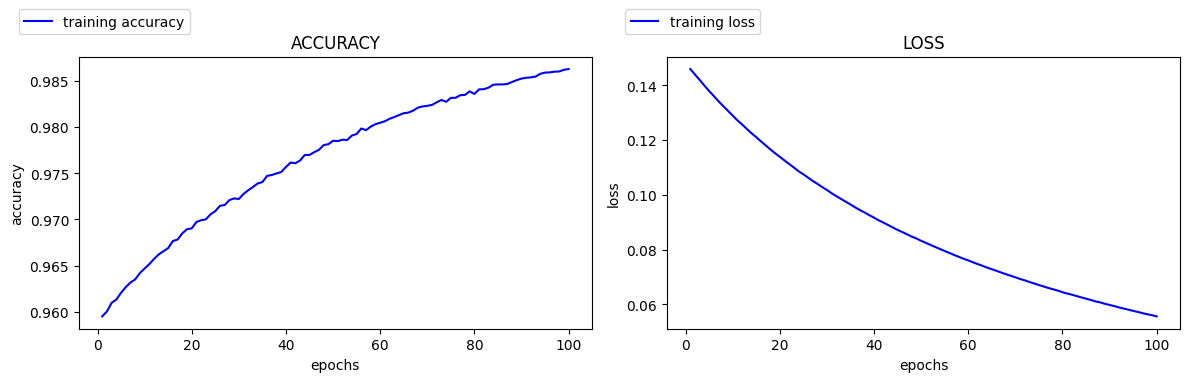

In [51]:
plot_history(history)